In [2]:
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [3]:
path = os.getcwd() + '\\PCA_dataset'
dataset = ImageDataGenerator().flow_from_directory(path)
y = dataset.classes

Found 40496 images belonging to 11 classes.


In [4]:
data = []
skipped = 0
for folder in os.listdir(path):
    image_folders = path + "\\" + folder
    for images in os.listdir(image_folders):
        image_path = image_folders + "\\" + images
        image_arr = cv2.imread(image_path)
        try:
            data.append(image_arr)
        except:
            print("Skipped: " + image_path)
            skipped += 1
        continue
print("Number of Images Skipped = ", skipped)
X = np.array(data)

Number of Images Skipped =  0


In [5]:
print(X.shape)
y = y.reshape(y.shape[0], 1)
print(y.shape)

(40496, 100, 100, 3)
(40496, 1)


In [6]:
X, y = shuffle(X, y, random_state = 0)
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(32396, 100, 100, 3)
(32396, 1)
(8100, 100, 100, 3)
(8100, 1)


## First Model

In [6]:
model = Sequential()
# Covolution layer
model.add(Conv2D(32,(3,3), activation='relu', input_shape=(100,100,3)))
# Pooling layer
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(11,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 76832)             0         
                                                                 
 dense (Dense)               (None, 256)               19669248  
                                                                 
 dense_1 (Dense)             (None, 11)                2827      
                                                                 
Total params: 19,672,971
Trainable params: 19,672,971
Non-trainable params: 0
____________________________________________

In [7]:
model.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size = 128, validation_split = 0.2, epochs = 30)

Epoch 1/30
203/203 [==============================] - 6s 16ms/step - loss: 219.3442 - accuracy: 0.2959 - val_loss: 2.1870 - val_accuracy: 0.2809
Epoch 2/30
203/203 [==============================] - 3s 14ms/step - loss: 1.7757 - accuracy: 0.4189 - val_loss: 1.7817 - val_accuracy: 0.4485
Epoch 3/30
203/203 [==============================] - 3s 14ms/step - loss: 1.3859 - accuracy: 0.5490 - val_loss: 1.6802 - val_accuracy: 0.4823
Epoch 4/30
203/203 [==============================] - 3s 14ms/step - loss: 1.1037 - accuracy: 0.6394 - val_loss: 1.6288 - val_accuracy: 0.5412
Epoch 5/30
203/203 [==============================] - 3s 14ms/step - loss: 0.9450 - accuracy: 0.7038 - val_loss: 1.6856 - val_accuracy: 0.5551
Epoch 6/30
203/203 [==============================] - 3s 14ms/step - loss: 0.7452 - accuracy: 0.7640 - val_loss: 1.6088 - val_accuracy: 0.5815
Epoch 7/30
203/203 [==============================] - 3s 14ms/step - loss: 0.6168 - accuracy: 0.8068 - val_loss: 1.7568 - val_accuracy: 0.58

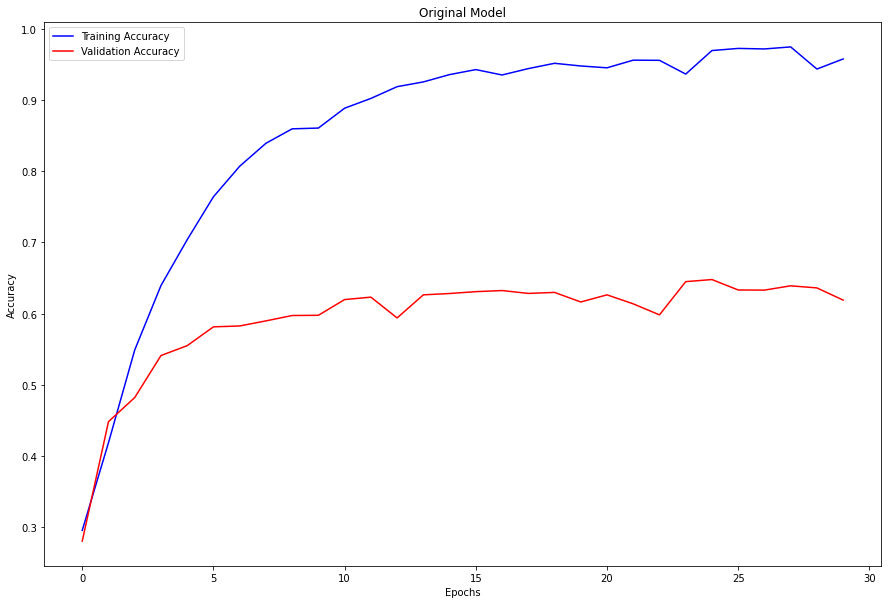

In [8]:
# Retrieve train accuracy
train_accuracy = history.history['accuracy']
# Used to retrieve number of epochs
epochs = range(len(train_accuracy))
# Retrieve validation accuracy
validation_accuracy = history.history['val_accuracy']
plt.rcParams["figure.figsize"] = (15,10)
plt.title('Original Model')
# Plot accuracy
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r', label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [9]:
# Evaluate your model performance (testing accuracy) on testing data.
testing_accuracy = model.evaluate(x_test, y_test)
# Print the loss and accuracy
print('Loss = ' + str(round(testing_accuracy[0],2)))
print('Accuracy = ' + str(round(testing_accuracy[1],2)))

254/254 [==============================] - 1s 3ms/step - loss: 4.5506 - accuracy: 0.6120
Loss = 4.55
Accuracy = 0.61


## Second Model Two Convolution Layers

In [10]:
model2 = Sequential()
# Covolution layer
model2.add(Conv2D(32,(3,3), activation='relu', input_shape=(100,100,3)))
# Pooling layer
model2.add(MaxPooling2D(2,2))

# Covolution layer
model2.add(Conv2D(64,(4,4), activation='relu'))
# Pooling layer
model2.add(MaxPooling2D(2,2))

model2.add(Flatten())

model2.add(Dense(256, activation='relu'))
model2.add(Dense(11,activation='softmax'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        32832     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 33856)             0         
                                                                 
 dense_2 (Dense)             (None, 256)              

In [11]:
model2.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])
history2 = model2.fit(x_train, y_train, batch_size = 128, validation_split = 0.2, epochs = 30)

Epoch 1/30
203/203 [==============================] - 6s 24ms/step - loss: 19.2470 - accuracy: 0.2960 - val_loss: 1.8570 - val_accuracy: 0.3869
Epoch 2/30
203/203 [==============================] - 5s 24ms/step - loss: 1.6543 - accuracy: 0.4525 - val_loss: 1.6477 - val_accuracy: 0.4437
Epoch 3/30
203/203 [==============================] - 5s 25ms/step - loss: 1.2475 - accuracy: 0.5854 - val_loss: 1.3933 - val_accuracy: 0.5472
Epoch 4/30
203/203 [==============================] - 5s 23ms/step - loss: 0.8893 - accuracy: 0.7143 - val_loss: 1.2848 - val_accuracy: 0.6073
Epoch 5/30
203/203 [==============================] - 5s 23ms/step - loss: 0.5968 - accuracy: 0.8114 - val_loss: 1.4146 - val_accuracy: 0.6298
Epoch 6/30
203/203 [==============================] - 5s 23ms/step - loss: 0.4661 - accuracy: 0.8561 - val_loss: 1.6305 - val_accuracy: 0.6191
Epoch 7/30
203/203 [==============================] - 5s 23ms/step - loss: 0.3651 - accuracy: 0.8906 - val_loss: 1.7160 - val_accuracy: 0.660

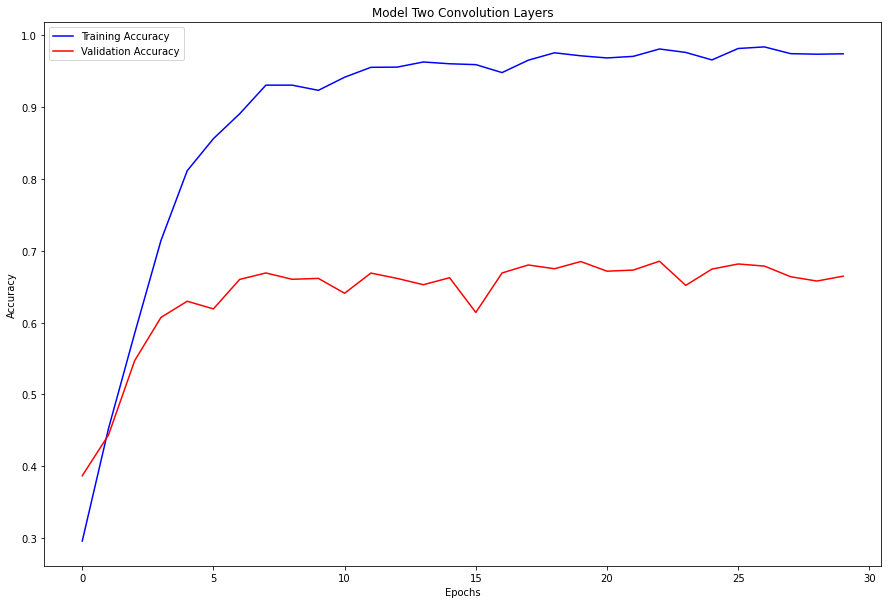

In [12]:
# Retrieve train accuracy
train_accuracy = history2.history['accuracy']
# Used to retrieve number of epochs
epochs = range(len(train_accuracy))
# Retrieve validation accuracy
validation_accuracy = history2.history['val_accuracy']
plt.rcParams["figure.figsize"] = (15,10)
plt.title('Model Two Convolution Layers')
# Plot accuracy
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r', label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
# Evaluate your model performance (testing accuracy) on testing data.
testing_accuracy = model2.evaluate(x_test, y_test)
# Print the loss and accuracy
print('Loss = ' + str(round(testing_accuracy[0],2)))
print('Accuracy = ' + str(round(testing_accuracy[1],2)))

254/254 [==============================] - 1s 3ms/step - loss: 3.5711 - accuracy: 0.6638
Loss = 3.57
Accuracy = 0.66


## Third Model Two Convolution Layers and 20% Dropout

In [15]:
model3 = Sequential()
# Covolution layer
model3.add(Conv2D(32,(3,3), activation='relu', input_shape=(100,100,3)))
# Pooling layer
model3.add(MaxPooling2D(2,2))

# Covolution layer
model3.add(Conv2D(64,(4,4), activation='relu'))
# Pooling layer
model3.add(MaxPooling2D(2,2))

model3.add(Flatten())

# Dropout layer aka regularization
model3.add(Dropout(0.20))

model3.add(Dense(256, activation='relu'))
model3.add(Dense(11,activation='softmax'))
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 46, 46, 64)        32832     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 33856)             0         
                                                                 
 dropout_5 (Dropout)         (None, 33856)            

In [16]:
model3.compile(optimizer = 'adam', loss = 'SparseCategoricalCrossentropy', metrics = ['accuracy'])
history3 = model3.fit(x_train, y_train, batch_size = 128, validation_split = 0.2, epochs = 30)

Epoch 1/30
203/203 [==============================] - 9s 41ms/step - loss: 12.7839 - accuracy: 0.3218 - val_loss: 1.6636 - val_accuracy: 0.4415
Epoch 2/30
203/203 [==============================] - 9s 43ms/step - loss: 1.5341 - accuracy: 0.4921 - val_loss: 1.4998 - val_accuracy: 0.5051
Epoch 3/30
203/203 [==============================] - 7s 33ms/step - loss: 1.2133 - accuracy: 0.5946 - val_loss: 1.2148 - val_accuracy: 0.5824
Epoch 4/30
203/203 [==============================] - 7s 33ms/step - loss: 0.9447 - accuracy: 0.6851 - val_loss: 1.1421 - val_accuracy: 0.6321
Epoch 5/30
203/203 [==============================] - 7s 36ms/step - loss: 0.7141 - accuracy: 0.7628 - val_loss: 1.2498 - val_accuracy: 0.6174
Epoch 6/30
203/203 [==============================] - 8s 40ms/step - loss: 0.6011 - accuracy: 0.8038 - val_loss: 1.1545 - val_accuracy: 0.6835
Epoch 7/30
203/203 [==============================] - 13s 63ms/step - loss: 0.4631 - accuracy: 0.8492 - val_loss: 1.2305 - val_accuracy: 0.68

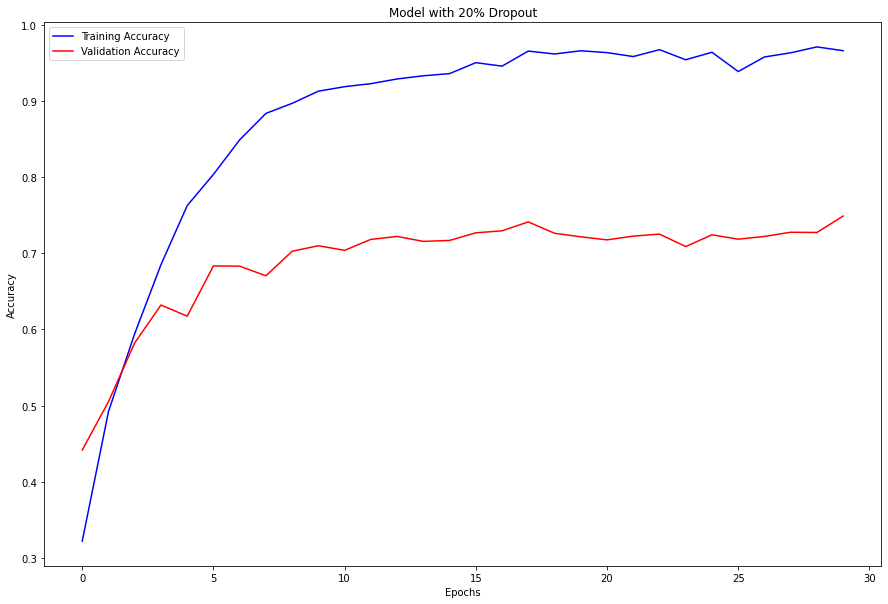

In [17]:
# Retrieve train accuracy
train_accuracy = history3.history['accuracy']
# Used to retrieve number of epochs
epochs = range(len(train_accuracy))
# Retrieve validation accuracy
validation_accuracy = history3.history['val_accuracy']
plt.rcParams["figure.figsize"] = (15,10)
plt.title('Model with 20% Dropout')
# Plot accuracy
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r', label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
# Evaluate your model performance (testing accuracy) on testing data.
testing_accuracy = model3.evaluate(x_test, y_test)
# Print the loss and accuracy
print('Loss = ' + str(round(testing_accuracy[0],2)))
print('Accuracy = ' + str(round(testing_accuracy[1],2)))

254/254 [==============================] - 1s 4ms/step - loss: 2.0926 - accuracy: 0.7469
Loss = 2.09
Accuracy = 0.75


## Final Model 

In [19]:
model4 = Sequential()
# Covolution layer
model4.add(Conv2D(32,(3,3), activation='relu', input_shape=(100,100,3)))
# Pooling layer
model4.add(MaxPooling2D(2,2))

# Covolution layer
model4.add(Conv2D(64,(4,4), activation='relu'))
# Pooling layer
model4.add(MaxPooling2D(2,2))

# Covolution layer
model4.add(Conv2D(64,(3,3),activation='relu'))
# Pooling layer
model4.add(MaxPooling2D(2,2))

model4.add(Flatten())

# Dropout layer aka regularization
model4.add(Dropout(0.20))

model4.add(Dense(256, activation='relu'))
model4.add(Dense(11,activation='softmax'))
model4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 46, 46, 64)        32832     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 21, 21, 64)        36928     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 10, 10, 64)      

In [20]:
model4.compile(optimizer = 'adam', loss = 'SparseCategoricalCrossentropy', metrics = ['accuracy'])
history4 = model4.fit(x_train, y_train, batch_size = 128, validation_split = 0.2, epochs = 30)

Epoch 1/30
203/203 [==============================] - 10s 46ms/step - loss: 3.2694 - accuracy: 0.3811 - val_loss: 1.5192 - val_accuracy: 0.5173
Epoch 2/30
203/203 [==============================] - 7s 36ms/step - loss: 1.3189 - accuracy: 0.5578 - val_loss: 1.1160 - val_accuracy: 0.6275
Epoch 3/30
203/203 [==============================] - 7s 33ms/step - loss: 1.0289 - accuracy: 0.6462 - val_loss: 0.9386 - val_accuracy: 0.6878
Epoch 4/30
203/203 [==============================] - 6s 31ms/step - loss: 0.8436 - accuracy: 0.7078 - val_loss: 0.8050 - val_accuracy: 0.7190
Epoch 5/30
203/203 [==============================] - 7s 33ms/step - loss: 0.7135 - accuracy: 0.7574 - val_loss: 0.8306 - val_accuracy: 0.7194
Epoch 6/30
203/203 [==============================] - 8s 40ms/step - loss: 0.5923 - accuracy: 0.7970 - val_loss: 0.6647 - val_accuracy: 0.7806
Epoch 7/30
203/203 [==============================] - 7s 33ms/step - loss: 0.5089 - accuracy: 0.8222 - val_loss: 0.6677 - val_accuracy: 0.791

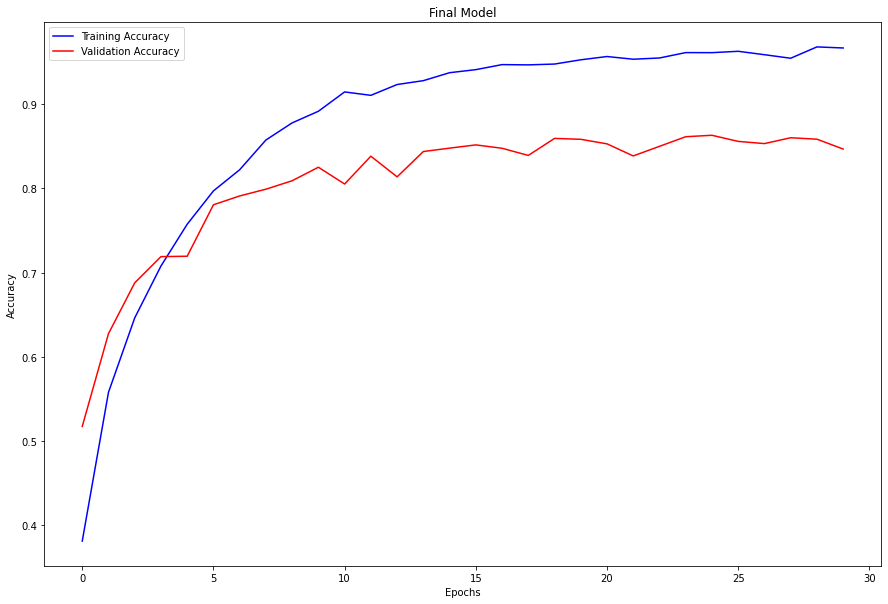

In [23]:
# Retrieve train accuracy
train_accuracy = history4.history['accuracy']
# Used to retrieve number of epochs
epochs = range(len(train_accuracy))
# Retrieve validation accuracy
validation_accuracy = history4.history['val_accuracy']
plt.rcParams["figure.figsize"] = (15,10)
plt.title('Final Model')
# Plot accuracy
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r', label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
# Evaluate your model performance (testing accuracy) on testing data.
testing_accuracy = model4.evaluate(x_test, y_test)
# Print the loss and accuracy
print('Loss = ' + str(round(testing_accuracy[0],2)))
print('Accuracy = ' + str(round(testing_accuracy[1],2)))

254/254 [==============================] - 1s 4ms/step - loss: 0.8493 - accuracy: 0.8509
Loss = 0.85
Accuracy = 0.85
